# Grand Average ERP Waveforms and Topographies

In the previous section, we have gone through the steps of the preprocessing of individual participant’s EEG data, in order to reduce noise and increase our sensitivity to any true experimental effects that may be present in the data.

Once we have preprocessed all of the individual participants’ data, we can perform group-level statistical analyses.

In this lesson, we will go through steps showing how to combine, visualize, and analyze ERP data across participants.

We’ll work with data from a group of participants, with the aim of testing an experimental hypothesis.

The present data come from an experiment in which an N400 was predicted.

In this experiment, people read sentences that ended in either a semantically congruent word (e.g., I take my coffee with milk and sugar), or an incongruent word (e.g., I take my coffee with milk and glass.).

We predicted an N400 effect, with more negative ERPs for incongruent words than congruent words.

Our hypothesis was that there would be a significantly greater negativity, between 400–600 ms, largest over midline central-posterior channels (Cz, CPz, Pz), for incongruent words than congruent words.

## Data Files

The dataset comprises preprocessed data files in MNE’s `.fif` format, one for each participant.

The data were preprocessed using the same steps as in the previous section, and the data files are named according to the experiment and participant number.

For example, the data file associated with participant 1 is named `sentence_n400_p01-ave.fif`.

Each individual participant data contains 80 trials (40 each of Violation and Control) and 64 channels.

The first thing we want to do, when working with ERP data at the group level, is to load in each individual’s preprocessed data, and then calculate the grand average (an average across a group of participants).

We will then plot the grand average ERPs, as waveforms and topomaps plots, to see how the conditions vary at the group level.

## Install MNE Library

In [1]:
# install MNE library
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 109.2 MB/s eta 0:00:00


## Download Data Files

The present study involves 26 data files.<br>
The list of the locations of these files is stored in a text file named `sentence_n400_files_list.txt`.

First, we download this text file, and then we download the data files using the `wget` utility.

In [2]:
# download text file containing the list of data files
!wget https://datascience.faseela.ma/wp-content/uploads/data-science/sentence_n400_files_list.txt

# download data files
!wget -i https://datascience.faseela.ma/wp-content/uploads/data-science/sentence_n400_files_list.txt

--2026-01-11 10:38:42--  https://datascience.faseela.ma/wp-content/uploads/data-science/sentence_n400_files_list.txt
Resolving datascience.faseela.ma (datascience.faseela.ma)... 169.60.78.87
Connecting to datascience.faseela.ma (datascience.faseela.ma)|169.60.78.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 701 [text/plain]
Saving to: ‘sentence_n400_files_list.txt’

sentence_n400_files 100%[===================>]     701  --.-KB/s    in 0s      

2026-01-11 10:38:42 (162 MB/s) - ‘sentence_n400_files_list.txt’ saved [701/701]

--2026-01-11 10:38:42--  https://datascience.faseela.ma/wp-content/uploads/data-science/sentence_n400_files_list.txt
Resolving datascience.faseela.ma (datascience.faseela.ma)... 169.60.78.87
Connecting to datascience.faseela.ma (datascience.faseela.ma)|169.60.78.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 701 [text/plain]
Saving to: ‘sentence_n400_files_list.txt.1’

sentence_n400_files 100%[===========

## Import Libraries

In [3]:
import mne
mne.set_log_level('error')

import matplotlib.pyplot as plt
import numpy as np
import glob

## Define Parameters

We define a list of experimental conditions.

In [4]:
# define experimental conditions
conditions = ['Control', 'Violation']

## Set a List of the Data Files

We use the Python **`glob`** module which allows to find pathnames matching a specified pattern, and returns a list of path names matching that pattern.

In [5]:
# create a list of the data files
data_files = glob.glob('sentence_n400_p*-ave.fif' )

# print list of the data files
data_files

['sentence_n400_p07-ave.fif',
 'sentence_n400_p02-ave.fif',
 'sentence_n400_p09-ave.fif',
 'sentence_n400_p20-ave.fif',
 'sentence_n400_p16-ave.fif',
 'sentence_n400_p25-ave.fif',
 'sentence_n400_p03-ave.fif',
 'sentence_n400_p14-ave.fif',
 'sentence_n400_p11-ave.fif',
 'sentence_n400_p06-ave.fif',
 'sentence_n400_p12-ave.fif',
 'sentence_n400_p13-ave.fif',
 'sentence_n400_p01-ave.fif',
 'sentence_n400_p21-ave.fif',
 'sentence_n400_p23-ave.fif',
 'sentence_n400_p15-ave.fif',
 'sentence_n400_p18-ave.fif',
 'sentence_n400_p26-ave.fif',
 'sentence_n400_p10-ave.fif',
 'sentence_n400_p22-ave.fif',
 'sentence_n400_p04-ave.fif',
 'sentence_n400_p19-ave.fif',
 'sentence_n400_p24-ave.fif',
 'sentence_n400_p05-ave.fif',
 'sentence_n400_p17-ave.fif']

## Read the Data Files

We store the data files as a dictionary, where:
* each key is a condition label,
* each value is a list of **`Evoked`** objects (the data from that condition, with each participant’s **`Evoked`** object as a list item).

We use the **`enumerate()`** function to loop over conditions and build our dictionary of **`Evoked`** objects.

We use the index from the **`enumerate()`** function to specify which condition (list item) we read from each participant’s data file.

We use list comprehension to build the list of **`Evoked`** objects for each condition.

In [6]:
# create dictionary for Evoked objects
evokeds = {}

for idx, c in enumerate(conditions):
    evokeds[c] = [mne.read_evokeds(d)[idx].set_montage('easycap-M1') for d in data_files]

evokeds

{'Control': [<Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
  <Evoked | 'Control' (average, N=27), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
  <Evoked | 'Control' (average, N=41), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
  <Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
  <Evoked | 'Control' (average, N=31), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
  <Evoked | 'Control' (average, N=37), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
  <Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
  <Evoked | 'Control' (average, N=35), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
  <Evoked | 'Control' (average, N=37), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
  <Evoked | 'Control' (average, N=32), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
  <Evoked | 'Control' (average, N=34), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
  <Evoked | 'Control' (average, 

## Compare Evoked Waveforms

We use the **`mne.viz.plot_compare_evokeds()`** function to plot **`Evoked`** waveforms.

It is used to plot and compare the time courses of one or more MNE **`Evoked`** objects across specified channels or channel types.

It provides an easy way to visualize differences between experimental conditions or groups of subjects.

It gets as argument a dictionary of **`Evoked`** objects and uses the keys as condition labels.

Furthermore, when it sees that each value in the dictionary is a list of **`Evoked`** objects, it will combine them and plot the mean across the list (i.e., across participants, for each condition), and also the 95% confidence intervals (CIs), representing the variability across participants.

In this study, the plot shows evidence of an N400 effect.

The difference between conditions is largest between ~350–650 ms, and the CIs are most distinct (overlapping little or not at all) between 500–650 ms.

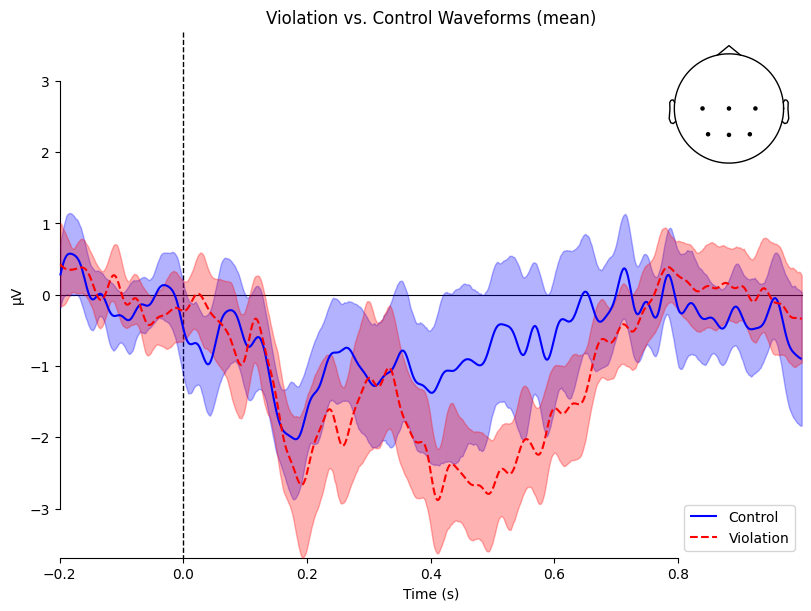

In [7]:
# define plot parameters
roi = ['C3', 'Cz', 'C4',
       'P3', 'Pz', 'P4']

# set line colors and styles
color_dict = {'Control':'blue', 'Violation':'red'}
linestyle_dict = {'Control':'-', 'Violation':'--'}

# plot waveforms
mne.viz.plot_compare_evokeds(evokeds,
                             combine='mean',
                             legend='lower right',
                             picks=roi, show_sensors='upper right',
                             colors=color_dict,
                             linestyles=linestyle_dict,
                             title='Violation vs. Control Waveforms'
                            );

## Difference Waveforms

We create difference waveforms to more easily visualize the difference between conditions, and compare it to zero (i.e., no difference between conditions).

In order to get CIs that reflect the variance across participants, we need to compute the Violation-Control difference separately for each participant.

We use the **`mne.combine_evoked()`** function which merges multiple **`Evoked`** data objects by calculating their weighted sum.

We set the values of weights as `1` for Violation and `-1` for Control.

We put this function in a list comprehension to loop over participants.

In [ ]:
# create difference waveform
diff_waves = [mne.combine_evoked([evokeds['Violation'][subj],
                                  evokeds['Control'][subj]
                                 ],
                                 weights=[1, -1]
                                 )
              for subj in range(len(data_files))
              ]
diff_waves

[<Evoked | 'Violation - Control' (average, N=19.487179487179485), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
 <Evoked | 'Violation - Control' (average, N=12.98076923076923), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
 <Evoked | 'Violation - Control' (average, N=20.24691358024691), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
 <Evoked | 'Violation - Control' (average, N=19.746835443037973), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
 <Evoked | 'Violation - Control' (average, N=16.65671641791045), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
 <Evoked | 'Violation - Control' (average, N=17.442857142857143), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
 <Evoked | 'Violation - Control' (average, N=20.0), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
 <Evoked | 'Violation - Control' (average, N=17.74647887323944), -0.19922 – 1 s, baseline off, 64 ch, ~387 KiB>,
 <Evoked | 'Violation - Control' (average, N=19.22077922077922), -0.19922 – 1 s, baseline off, 64 ch, ~387

## Plot Difference Waveform

We use the **`mne.viz.plot_compare_evokeds()`** to plot the difference waveform.

The argument passed to this function is a dictionary in which each entry is a list of **`Evoked`** objects.<br>
The function will average them together and draw CIs.

We create a dictionary "on the fly" inside the plotting command, with a key corresponding to the label we want, and the value being the list of difference waves.

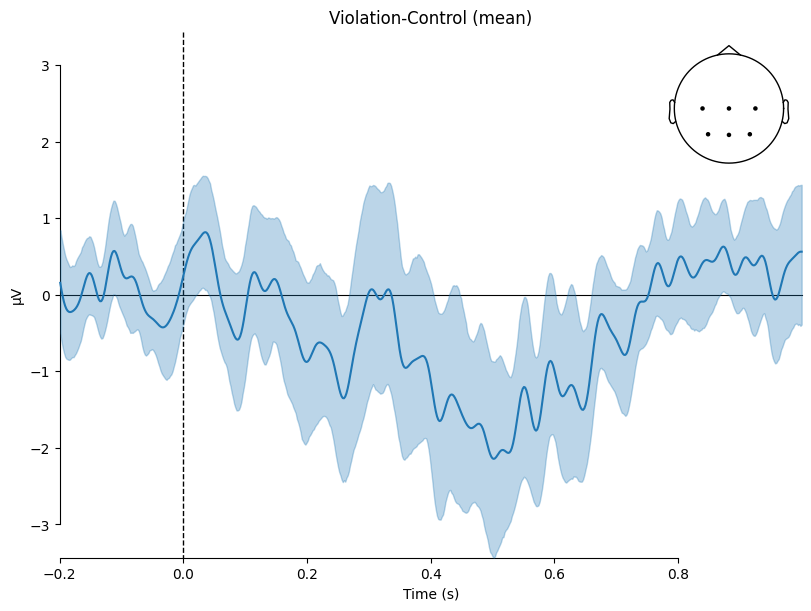

In [ ]:
# set plot title
contrast = 'Violation-Control'

# plot difference waveform
mne.viz.plot_compare_evokeds({contrast:diff_waves}, combine='mean',
                            legend=None,
                            picks=roi, show_sensors='upper right',
                            title=contrast
                            );

The 95% CI provides an easy visual aid for interpreting the results.

If the CI overlaps zero, then the difference between conditions is not statistically significant.

If the CI does not overlap zero, then the difference can be considered statistically significant.

In this case, the CI largely does not overlap zero between ~400–600 ms, so we can conclude that the difference between conditions is statistically significant in that time window.

## Scalp Topographic Map

We use the **`mne.viz.plot_evoked_topomap()`** function to plot the topographic map.

This function accepts only a single **`Evoked`** object as input.

We use the **`mne.grand_average()`** function to create a single **`Evoked`** object from the list of **`Evoked`** objects.

Grand averaging is a term used in EEG research to refer to an average across participants, to distinguish such an average from an average across trials, for a single participant.

Here we plot the topographic map for the average amplitude over a 200 ms period, centered on 400 ms (i.e., 300–500 ms).

We use the following parameters:
* The **`show_names`** keyword argument tells the function to plot the names of each channel. We also use **`sensors=False`** otherwise the dots for each channel would overlap the names.
* The **`contours=False`** keyword argument turns off the dashed contour lines.
* The **`size`** keyword argument sets the size of the plot.

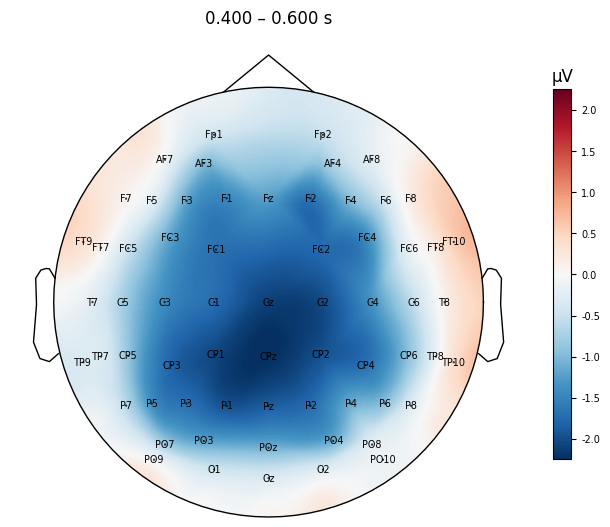

In [ ]:
# create grand average Evoked object
grand_average = mne.grand_average(diff_waves)

# plot topomap
mne.viz.plot_evoked_topomap(grand_average,
                            times=.500, average=0.200,
                            show_names=True,
                            contours=False,
                            size=4
                           );

## Summary

In this lesson we learned how to load a group of Evoked objects, and how to plot the average waveforms for each condition, and the 95% confidence intervals (CIs) for each.

We also learned how to create difference waves, and plot the average difference wave with CIs.

Finally, we learned how to plot a scalp topographic map of the average amplitude over a time window of interest.